<a href="https://colab.research.google.com/github/jaeriver/2022_AI_Security_Project/blob/main/Final_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
from keras.utils.np_utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataset=pd.read_csv('/content/drive/MyDrive/인공지능보안프로젝트/datasets/Monday_preprocess.csv')
df = train_dataset.drop(['Label'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df
df_col = df.columns

In [ ]:
test_dataset=pd.read_csv('/content/drive/MyDrive/인공지능보안프로젝트/datasets/Wednesday_preprocess.csv')
test_dataset

,Unnamed: 0,ts,te,td,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt,Label
0,0,20170705010000,20170705010000,5,3496979400,3232238097,443,58926,6,0,0.0,3,0,Normal
1,1,20170705010000,20170705010005,5291703,3232238097,1209359133,59573,80,6,1,0.0,3,0,Normal
2,2,20170705010000,20170705010000,3,3496979400,3232238097,443,58938,6,0,0.0,3,0,Normal
3,3,20170705010000,20170705010005,5084237,3232238097,3496979400,58938,443,6,8,3728.0,10,934,Normal
4,4,20170705010000,20170705010000,3,3232238131,1249711724,33941,465,6,0,0.0,2,37,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,692698,20170705125900,20170705125900,31197,3232238096,3232238083,59180,53,17,2,256.0,2,64,Normal
692699,692699,20170705125900,20170705125900,30,2784897153,3232238096,443,34438,6,1,6.0,2,31,Normal
692700,692700,20170705125900,20170705125900,112,398626041,3232238096,443,33488,6,1,6.0,2,31,Normal
692701,692701,20170705125900,20170705125900,87580,3232238096,2173832803,46326,443,6,1,0.0,1,0,Normal


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

x1 = StandardScaler().fit_transform(df[0:])
x2 = RobustScaler().fit_transform(df[0:])
x3 = MinMaxScaler().fit_transform(df[0:])
x4 = MaxAbsScaler().fit_transform(df[0:])


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(x1)
principalDf1 = pd.DataFrame(
    data = principalComponents1,
    columns = ['x', 'y']
    )

principalDf1
standard_rmdf = principalDf1[principalDf1['x'] > 0]


principalComponents2 = pca.fit_transform(x2)
principalDf2 = pd.DataFrame(
    data = principalComponents2,
    columns = ['x', 'y']
    )

robust_rmdf = principalDf2[principalDf2['y'] > 0.05]
standard_rmdf

,x,y
0,0.106635,-1.460015
2,0.145412,1.585267
4,0.077111,-1.913262
5,0.046932,-1.460408
7,0.030539,-1.386402
...,...,...
529908,0.154536,-0.650250
529910,0.114008,-0.410091
529912,0.293612,-0.230173
529913,0.131379,-0.551600


In [ ]:
standard_list = list(standard_rmdf.index)
principalComponents1 = pd.DataFrame(x1, columns = df_col)
label_list = []

principalComponents1['Label'] = 'Normal'
standard_df = principalComponents1

for idx in standard_list:
  standard_df['Label'][idx] = 'Anormal'


standard_df.to_csv('/content/drive/MyDrive/인공지능보안프로젝트/datasets/Monday_Standard_Normal.csv')
robust_list = list(robust_rmdf.index)
principalComponents2 = pd.DataFrame(x2, columns = df_col)
robust_df = principalComponents2.drop(robust_list)
robust_df
robust_df.to_csv('/content/drive/MyDrive/인공지능보안프로젝트/datasets/Monday_Robust_Normal.csv')

standard_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ts,te,td,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt,Label
0,-1.596917,-1.597767,-0.358426,0.393771,-2.368164,0.781272,-0.476918,-0.854834,-0.005554,-0.006511,-0.000437,0.028992,Anormal
1,-1.596917,-1.597767,-0.361342,-3.248083,0.567861,-1.635225,2.278644,-0.854834,-0.009816,-0.006690,-0.009402,-0.079539,Normal
2,-1.596917,-1.593840,3.767072,-3.587419,-2.642139,-1.653387,-0.497628,-1.957874,-0.009816,-0.006690,0.073520,-0.085479,Anormal
3,-1.596917,-1.597767,-0.358325,0.393771,0.567861,0.851502,-0.495151,1.167405,-0.008964,-0.006665,-0.010522,-0.077291,Normal
4,-1.596917,-1.594288,3.149198,0.393771,0.567861,0.443532,-0.495151,1.167405,-0.006407,-0.006434,-0.007161,-0.062681,Anormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
529913,1.284587,1.385908,1.866874,0.393771,-1.871518,0.714774,-0.476918,-0.854834,-0.009816,-0.006690,-0.009402,-0.073599,Anormal
529914,1.284587,1.283916,-0.361333,0.393771,-2.368164,0.781190,-0.476918,-0.854834,-0.008964,-0.006690,-0.008281,-0.082589,Anormal
529915,1.284587,1.283916,-0.361339,-0.033356,0.567861,-1.635225,2.271865,-0.854834,-0.008964,-0.006690,-0.010522,-0.085479,Normal
529916,1.284612,1.283941,-0.361321,0.393771,0.567861,-1.647770,-0.491224,1.167405,-0.004702,-0.006551,-0.004920,-0.019975,Normal


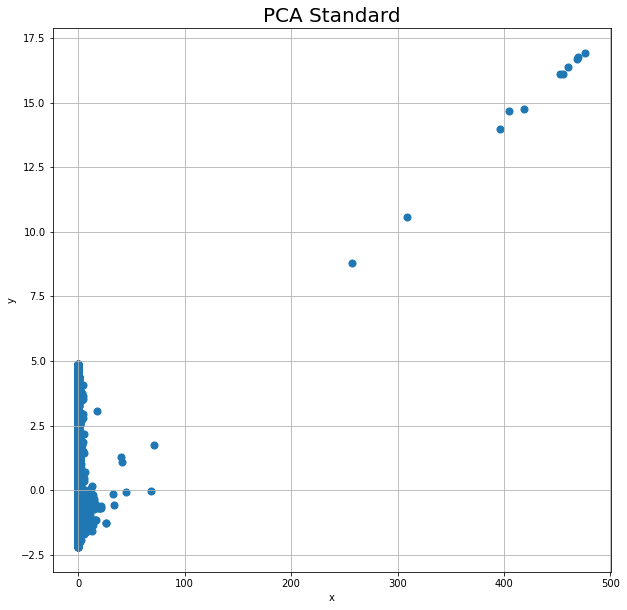

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.scatter(
    principalDf1['x'],
    principalDf1['y'],
    s = 50
    )
plt.xlabel('x')
plt.ylabel('y')
plt.title('PCA Standard', fontsize = 20)

plt.grid()

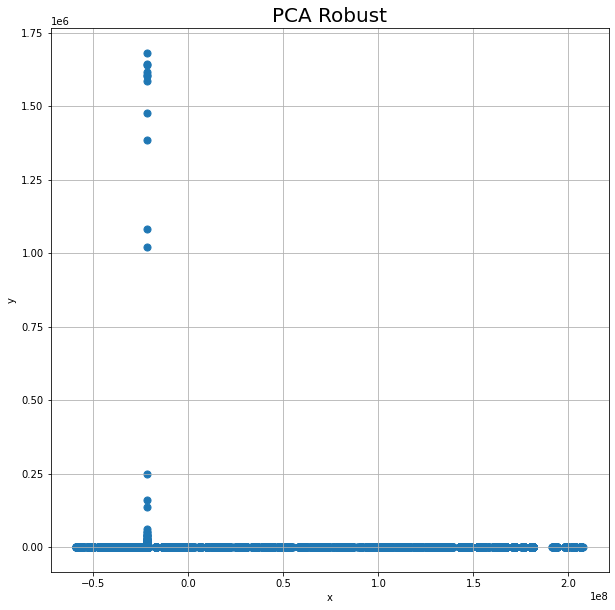

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.scatter(
    principalDf2['x'],
    principalDf2['y'],
    s = 50
    )
plt.xlabel('x')
plt.ylabel('y')
plt.title('PCA Robust', fontsize = 20)

plt.grid()

# KMeans 군집화 코드 시작 (Unusage)

In [ ]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=2)
kmeans.fit(x1[0:])

print(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [ ]:
!pip install scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids 

kmedoids = KMedoids(n_clusters=2)
kmedoids.fit(x1[0:])

print(kmedoids.labels_)

In [ ]:
np.count_nonzero(kmedoids.labels_ == 1)

In [ ]:
np.count_nonzero(kmedoids.labels_ == 0)

In [ ]:
df[:]

In [ ]:
label = pd.DataFrame({"Label":kmedoids.labels_})
label

In [ ]:
train_data = pd.DataFrame(df[0:100])

In [ ]:
train_data = pd.concat([train_data,label],axis=1)

In [ ]:
def train_test_dataset1(df):
    X_train= df.drop(['Label'],axis=1)
    y_train = df.iloc[:, -1].values.reshape(-1,1)
    y_train = np.ravel(y_train)
    # X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0, stratify = y)
    # return  X_train, X_test, y_train, y_test
    return X_train,y_train

In [ ]:
def train_test_dataset2(df):
    df.loc[df['Label'] == 'Normal', 'Label'] = 0
    df.loc[df['Label'] == 'Anormal', 'Label'] = 1
    X_test = df.drop(['Label'],axis=1)
    y_test = df.iloc[:, -1].values.reshape(-1,1)
    y_test = np.ravel(y_test)
    # X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0, stratify = y)
    # return  X_train, X_test, y_train, y_test
    return X_test,y_test

In [ ]:
def RandomForest(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(random_state = 0)
    imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)
    rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor

    print(X_test)

    # rf_score=rf.score(np.where(X_test > 0.5, 1 , 0),y_test)
    # rf_score=rf.score(X_test,y_test)
    
    y_predict=rf.predict(X_test)
    y_true=y_test

    print(y_predict)
    print(y_true)

    print('Random Forest Accuracy:'+ str(rf_score))
    precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
    print('Random Forest precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))
    
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    return rf_score,precision,recall,fscore,none

In [ ]:
NA_X_train, NA_y_train = df, label
NA_X_test, NA_y_test=train_test_dataset2(test_dataset)

In [ ]:
NA_X_train

In [ ]:
NA_y_train

In [ ]:
np.count_nonzero(NA_y_train == 1)

In [ ]:
NA_X_test

In [ ]:
NA_y_test

In [ ]:
np.count_nonzero(NA_y_test == 1)

In [ ]:
narf_score,narf_precision,narf_recall,narf_fscore,none=RandomForest(NA_X_train, NA_X_test, NA_y_train, NA_y_test)